<a href="https://colab.research.google.com/github/pikey-msc/AprendizMaquina/blob/main/2023-1/Ensambles/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Son un grupo de algoritmos de aprendizaje automático que combinan muchos modelos de aprendizaje débiles para crear un modelo predictivo sólido. Los árboles de decisión generalmente se usan cuando se hace un aumento de gradiente. Los modelos de aumento de gradiente se están volviendo populares debido a su eficacia en la clasificación de conjuntos de datos complejos

Gradient Boosting

La idea detrás es tomar una hipótesis débil o un algoritmo de aprendizaje débil y hacerle una serie de ajustes que mejorarán la fuerza de la hipótesi. Este tipo de Impulso de Hipótesis se basa en la idea de Probabilidad Aproximadamente Correcta (PAC).

Este método de aprendizaje PAC investiga problemas de aprendizaje automático para interpretar qué tan complejos son

Hypothesis Boosting

observa todas las observaciones en las que se entrena el algoritmo de aprendizaje automático y deja solo las observaciones que el método de aprendizaje automático clasificó con éxito, eliminando las otras observaciones. Se crea un nuevo modelo débil y se prueba en el conjunto de datos que se clasificó de manera deficiente, y luego solo se conservan los ejemplos que se clasificaron con éxito.

Adaptive Boosting ( AdaBoost ). 

Para AdaBoost, se crean muchos modelos débiles al inicializar muchos algoritmos de árboles de decisión que solo tienen una única división, como el "tocón" en la imagen a continuación.
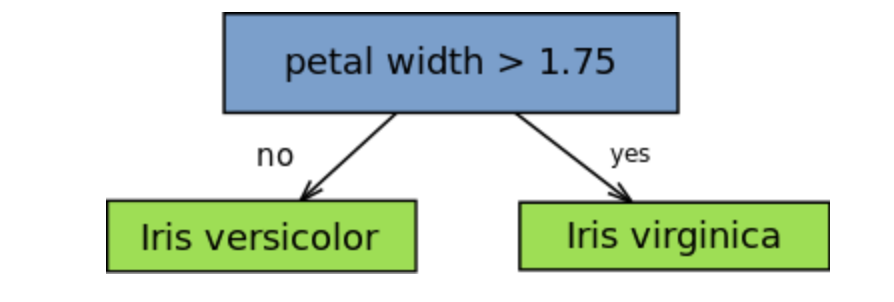

Las instancias/observaciones en el conjunto de entrenamiento son ponderadas por el algoritmo y se asigna más peso a las instancias que son difíciles de clasificar. Los modelos más débiles se agregan al sistema de forma secuencial y se asignan a las instancias de capacitación más difíciles.

En AdaBoost, las predicciones se realizan por mayoría de votos, y las instancias se clasifican según la clase que recibe la mayor cantidad de votos de los modelos débiles.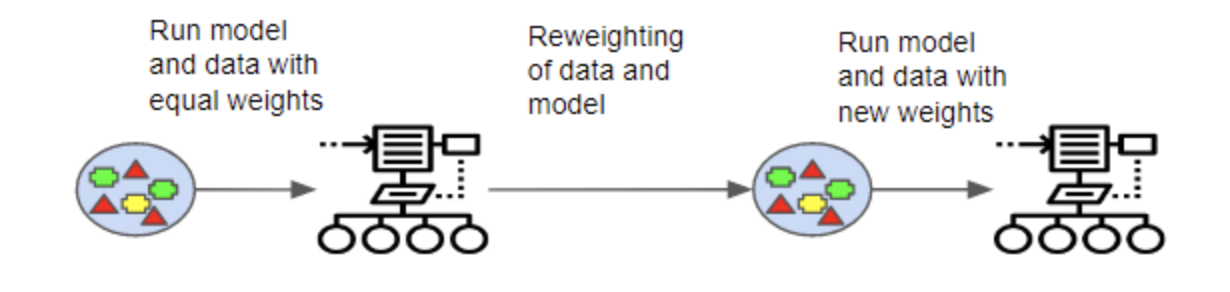

Los clasificadores de aumento de gradiente son el método AdaBoosting combinado con la minimización ponderada, después de lo cual se vuelven a calcular los clasificadores y las entradas ponderadas. El objetivo de los clasificadores Gradient Boosting es minimizar la pérdida, o la diferencia entre el valor de clase real del ejemplo de entrenamiento y el valor de clase predicho. No es necesario comprender el proceso para reducir la pérdida del clasificador, pero funciona de manera similar al descenso de gradiente en una red neuronal.

Teoría detrás del Gradient Bossting

El clasificador de aumento de gradiente depende de una función de pérdida . Se puede usar una función de pérdida personalizada, y muchas funciones de pérdida estandarizadas son compatibles con clasificadores de aumento de gradiente, pero la función de pérdida tiene que ser diferenciable.

Los algoritmos de clasificación suelen utilizar pérdidas logarítmicas, mientras que los algoritmos de regresión pueden utilizar errores cuadráticos. Los sistemas de aumento de gradiente no tienen que derivar una nueva función de pérdida cada vez que se agrega el algoritmo de aumento, sino que se puede aplicar cualquier función de pérdida diferenciable al sistema

Los sistemas de aumento de gradiente tienen otras dos partes necesarias: un modelo débil y un componente aditivo. Los sistemas de aumento de gradiente utilizan árboles de decisión como sus aprendices débiles. Los árboles de regresión se utilizan para los estudiantes débiles y estos árboles de regresión generan valores reales. Debido a que los resultados son valores reales, a medida que se agregan nuevos modelos al modelo, los resultados de los árboles de regresión se pueden sumar para corregir errores en las predicciones.

El componente aditivo de un Gradient Boosting proviene del hecho de que los árboles se agregan al modelo con el tiempo y, cuando esto ocurre, los árboles existentes no se manipulan, sus valores permanecen fijos.

Se utiliza un procedimiento similar al descenso de gradiente para minimizar el error entre parámetros dados. Esto se hace tomando la pérdida calculada y realizando un descenso de gradiente para reducir esa pérdida. Posteriormente, se modifican los parámetros del árbol para reducir la pérdida residual.

La salida del nuevo árbol se agrega luego a la salida de los árboles anteriores utilizados en el modelo. Este proceso se repite hasta que se alcanza un número de árboles previamente especificado, o la pérdida se reduce por debajo de un cierto umbral.

Pasos para el Gradient Boosting

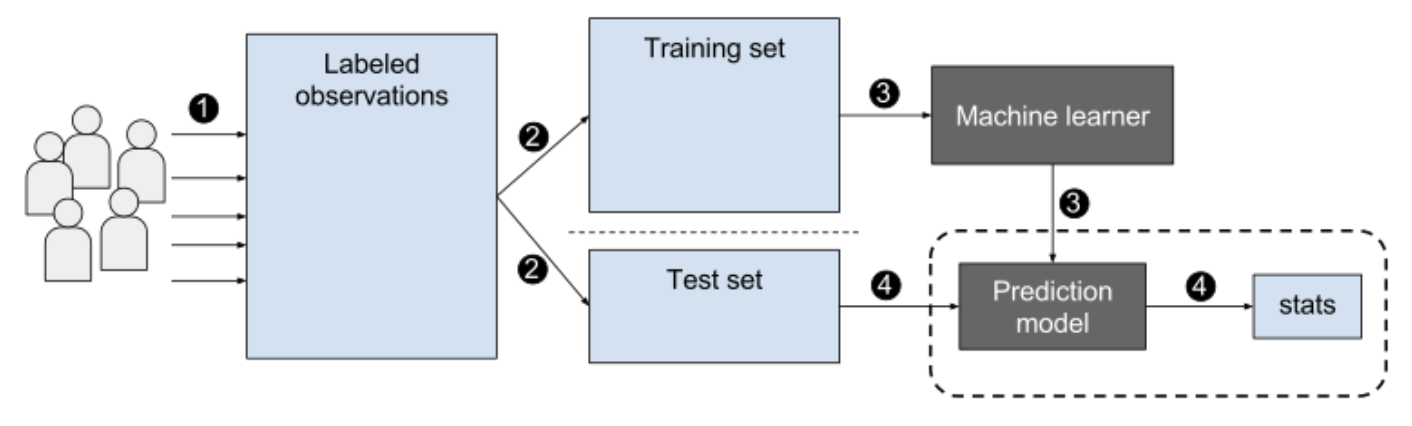

Para implementar un Gradient Boosting Classifier, necesitaremos llevar a cabo una serie de pasos diferentes. Tendremos que:

·Ajuste el modelo
·Ajuste los parámetros e hiperparámetros del modelo
·Hacer predicciones
·Interpretar los resultados

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
 !git clone https://github.com/pikey-msc/AprendizMaquina

Cloning into 'AprendizMaquina'...
remote: Enumerating objects: 327, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (224/224), done.
remote: Total 327 (delta 75), reused 130 (delta 28), pack-reused 66
Receiving objects: 100% (327/327), 37.93 MiB | 8.68 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [ ]:
train_data = pd.read_csv("/content/AprendizMaquina/2023-1/Ensambles/train.csv")
test_data = pd.read_csv("/content/AprendizMaquina/2023-1/Ensambles/test.csv")

In [ ]:
y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)

In [ ]:
full_data = train_data.append(test_data)

In [ ]:
drop_columns = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
full_data.drop(labels=drop_columns, axis=1, inplace=True)

In [ ]:
full_data = pd.get_dummies(full_data, columns=["Sex"])
full_data.fillna(value=0.0, inplace=True)

In [ ]:
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)


In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

In [ ]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

In [ ]:
#XGBoost

from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

In [ ]:
score = xgb_clf.score(X_val, y_val)
print(score)

Conclusión

Los modelos de aumento de gradiente son potentes algoritmos que se pueden utilizar tanto para tareas de clasificación como de regresión. Los modelos de aumento de gradiente pueden funcionar increíblemente bien en conjuntos de datos muy complejos, pero también son propensos al sobreajuste, que se puede combatir con varios de los métodos descritos anteriormente. Los clasificadores de aumento de gradiente también son fáciles de implementar en Scikit-Learn.